In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
x_min = -np.pi / 2
x_max = np.pi / 2

t_max = 0.15

In [58]:
def FTCS(N:int):

    dx = (x_max - x_min) / (N-1)
    dt = (dx**2) / 2
    r = dt / (dx**2)

    # Initial condition
    x = np.linspace(x_min, x_max, N)
    u = np.cos(3*x)

    # Boundary condition
    u[0] = u[-1] = 0

    t = 0.0
    while t < t_max:

        if t > (t_max - dt):
            dt = t_max - t
        t = t + dt

        u_cache = u.copy()
        for i in range(1, N-1):
            # FTCS scheme
            u_cache[i] = u[i] + r * (u[i+1] - 2 * u[i] + u[i-1])
        u = u_cache

    v = np.exp(-9 * t_max) * np.cos(3 * x)
    error = np.abs(u - v)
    L2_norm = np.sqrt(np.sum(error**2) * dx)
    Linf_norm = np.max(error)

    return u, v, dx, L2_norm, Linf_norm

In [59]:
N_list = [50, 100, 200, 400]
result = []
for N in N_list:
    _, _, dx, L2_error, Linf_error = FTCS(N)
    result.append([N, dx, L2_error, Linf_error])

In [60]:
df = pd.DataFrame(result, columns=["N", "dx", "L_2 error", "L_inf order"])

In [61]:
L2_order = []
Linf_order = []
for i in range(1, 4):
    L2 = np.log2(result[i][2] / result[i-1][2]) / np.log2(result[i][1] / result[i-1][1])
    Linf = np.log2(result[i][3] / result[i-1][3]) / np.log2(result[i][1] / result[i-1][1])
    L2_order.append(L2)
    Linf_order.append(Linf)

L2_order.insert(0, 'NA')
Linf_order.insert(0, 'NA')
df.insert(loc=3, column='L_2 Convergence order', value=L2_order)
df.insert(loc=5, column='L_inf Convergence order', value=Linf_order)

In [62]:
print(df)

     N        dx  L_2 error L_2 Convergence order  L_inf order  \
0   50  0.064114   0.002830                    NA     0.002257   
1  100  0.031733   0.000789               1.81615     0.000629   
2  200  0.015787   0.000264              1.569045     0.000210   
3  400  0.007874   0.000120               1.13693     0.000095   

  L_inf Convergence order  
0                      NA  
1                1.817031  
2                1.567466  
3                1.136986  


In [63]:
N_test = 50
x_test = np.linspace(x_min, x_max, N_test)
num, ana, _, _, _ = FTCS(N_test)

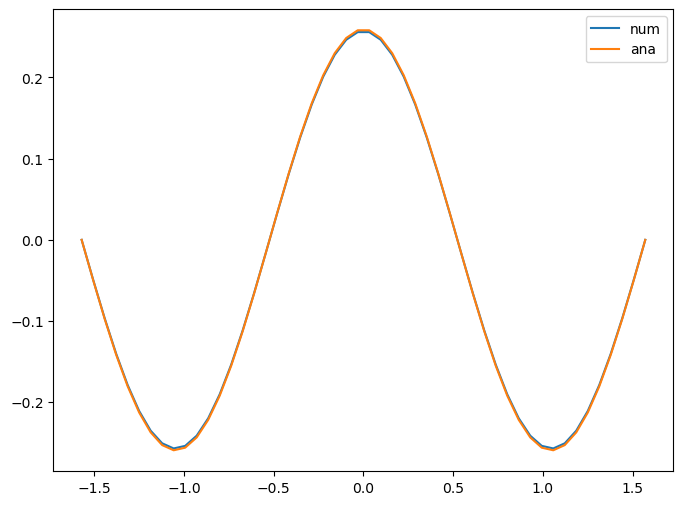

In [64]:
plt.figure(figsize=(8,6))
plt.plot(x_test, num, label='num')
plt.plot(x_test, ana, label='ana')
plt.legend()